In [ ]:
# Loading Data 

In [540]:
import numpy as np
wordsList = np.load('wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('wordVectors.npy')
print ('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


In [541]:
#Just to make sure everything has been loaded in correctly, we can look at the dimensions of the vocabulary list and the embedding matrix. 

In [542]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


In [543]:
#We can also search our word list for a word like "baseball", and then access its corresponding vector through the embedding matrix.

In [544]:
baseballIndex = wordsList.index('baseball')
wordVectors[baseballIndex]

array([-1.9327  ,  1.0421  , -0.78515 ,  0.91033 ,  0.22711 , -0.62158 ,
       -1.6493  ,  0.07686 , -0.5868  ,  0.058831,  0.35628 ,  0.68916 ,
       -0.50598 ,  0.70473 ,  1.2664  , -0.40031 , -0.020687,  0.80863 ,
       -0.90566 , -0.074054, -0.87675 , -0.6291  , -0.12685 ,  0.11524 ,
       -0.55685 , -1.6826  , -0.26291 ,  0.22632 ,  0.713   , -1.0828  ,
        2.1231  ,  0.49869 ,  0.066711, -0.48226 , -0.17897 ,  0.47699 ,
        0.16384 ,  0.16537 , -0.11506 , -0.15962 , -0.94926 , -0.42833 ,
       -0.59457 ,  1.3566  , -0.27506 ,  0.19918 , -0.36008 ,  0.55667 ,
       -0.70315 ,  0.17157 ], dtype=float32)

In [545]:
#Now that we have our vectors, our first step is taking an input sentence and then constructing the its vector representation. Let's say that we have the input sentence "I thought the movie was incredible and inspiring". In order to get the word vectors, we can use Tensorflow's embedding lookup function. This function takes in two arguments, one for the embedding matrix (the wordVectors matrix in our case), and one for the ids of each of the words. The ids vector can be thought of as the integerized representation of the training set. This is basically just the row index of each of the words. Let's look at a quick example to make this concrete. 

In [546]:
import tensorflow as tf
maxSeqLength = 10 #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
#firstSentence[8] and firstSentence[9] are going to be 0
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


In [548]:
#The 10 x 50 output should contain the 50 dimensional word vectors for each of the 10 words in the sequence.
#Lets display the word vec 

In [549]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)

(10, 50)


In [550]:
# seeing the input files 

In [551]:
from os import listdir
from os.path import isfile, join
positiveFiles = ['positiveReviews/' + f for f in listdir('positiveReviews/') if isfile(join('positiveReviews/', f))]
negativeFiles = ['negativeReviews/' + f for f in listdir('negativeReviews/') if isfile(join('negativeReviews/', f))]
numWords = []
for pf in positiveFiles:
    with open(pf, "r") as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)       
print('Positive files finished')

for nf in negativeFiles:
    with open(nf, "r") as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)  
print('Negative files finished')

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

Positive files finished
Negative files finished
('The total number of files is', 25000)
('The total number of words in the files is', 5844464)
('The average number of words in the files is', 233)


In [552]:
#The training set we're going to use is the Imdb movie review dataset. This set has 25,000 movie reviews, with 12,500 positive reviews and 12,500 negative reviews. Each of the reviews is stored in a txt file that we need to parse through. The positive reviews are stored in one directory and the negative reviews are stored in another. The following piece of code will determine total and average number of words in each review. 

In [553]:
#We can also use the Matplot library to visualize this data in a histogram format. 

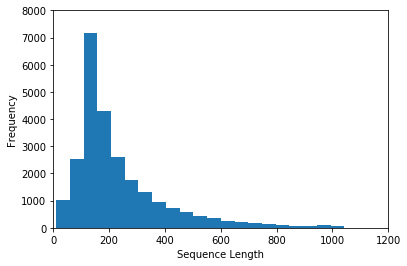

In [554]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

In [82]:
#From the histogram as well as the average number of words per file, we can safely say that most reviews will fall under 250 words, which is the max sequence length value we will set. 

In [555]:
maxSeqLength = 250

In [556]:
#Let's see how we can take a single file and transform it into our ids matrix. This is what one of the reviews looks like in text file format.

In [557]:
fname = positiveFiles[3] #Can use any valid index (not just 3)
with open(fname) as f:
    for lines in f:
        print(lines)
        exit

It's a strange feeling to sit alone in a theater occupied by parents and their rollicking kids. I felt like instead of a movie ticket, I should have been given a NAMBLA membership.<br /><br />Based upon Thomas Rockwell's respected Book, How To Eat Fried Worms starts like any children's story: moving to a new town. The new kid, fifth grader Billy Forrester was once popular, but has to start anew. Making friends is never easy, especially when the only prospect is Poindexter Adam. Or Erica, who at 4 1/2 feet, is a giant.<br /><br />Further complicating things is Joe the bully. His freckled face and sleeveless shirts are daunting. He antagonizes kids with the Death Ring: a Crackerjack ring that is rumored to kill you if you're punched with it. But not immediately. No, the death ring unleashes a poison that kills you in the eight grade.<br /><br />Joe and his axis of evil welcome Billy by smuggling a handful of slimy worms into his thermos. Once discovered, Billy plays it cool, swearing tha

In [558]:
print(lines)

It's a strange feeling to sit alone in a theater occupied by parents and their rollicking kids. I felt like instead of a movie ticket, I should have been given a NAMBLA membership.<br /><br />Based upon Thomas Rockwell's respected Book, How To Eat Fried Worms starts like any children's story: moving to a new town. The new kid, fifth grader Billy Forrester was once popular, but has to start anew. Making friends is never easy, especially when the only prospect is Poindexter Adam. Or Erica, who at 4 1/2 feet, is a giant.<br /><br />Further complicating things is Joe the bully. His freckled face and sleeveless shirts are daunting. He antagonizes kids with the Death Ring: a Crackerjack ring that is rumored to kill you if you're punched with it. But not immediately. No, the death ring unleashes a poison that kills you in the eight grade.<br /><br />Joe and his axis of evil welcome Billy by smuggling a handful of slimy worms into his thermos. Once discovered, Billy plays it cool, swearing tha

In [559]:
#code for summarizing the tweet 
from collections import Counter
from math import fabs
from re import split as regex_split, sub as regex_sub, UNICODE as REGEX_UNICODE

#defining stop words
stopWords = set([
    "-", " ", ",", ".", "a", "e", "i", "o", "u", "t", "about", "above",
    "above", "across", "after", "afterwards", "again", "against", "all",
    "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and",
    "another", "any", "anyhow", "anyone", "anything", "anyway",
    "anywhere", "are", "around", "as", "at", "back", "be", "became",
    "because", "become", "becomes", "becoming", "been", "before",
    "beforehand", "behind", "being", "below", "beside", "besides",
    "between", "beyond", "both", "bottom", "but", "by", "call", "can",
    "cannot", "can't", "co", "con", "could", "couldn't", "de",
    "describe", "detail", "did", "do", "done", "down", "due", "during",
    "each", "eg", "eight", "either", "eleven", "else", "elsewhere",
    "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty",
    "fill", "find", "fire", "first", "five", "for", "former",
    "formerly", "forty", "found", "four", "from", "front", "full",
    "further", "get", "give", "go", "got", "had", "has", "hasnt",
    "have", "he", "hence", "her", "here", "hereafter", "hereby",
    "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "into", "is", "it", "its", "it's", "itself", "just", "keep", "last",
    "latter", "latterly", "least", "less", "like", "ltd", "made", "make",
    "many", "may", "me", "meanwhile", "might", "mill", "mine", "more",
    "moreover", "most", "mostly", "move", "much", "must", "my", "myself",
    "name", "namely", "neither", "never", "nevertheless", "new", "next",
    "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing",
    "now", "nowhere", "of", "off", "often", "on", "once", "one", "only",
    "onto", "or", "other", "others", "otherwise", "our", "ours",
    "ourselves", "out", "over", "own", "part", "people", "per",
    "perhaps", "please", "put", "rather", "re", "said", "same", "see",
    "seem", "seemed", "seeming", "seems", "several", "she", "should",
    "show", "side", "since", "sincere", "six", "sixty", "so", "some",
    "somehow", "someone", "something", "sometime", "sometimes",
    "somewhere", "still", "such", "take", "ten", "than", "that", "the",
    "their", "them", "themselves", "then", "thence", "there",
    "thereafter", "thereby", "therefore", "therein", "thereupon",
    "these", "they", "thickv", "thin", "third", "this", "those",
    "though", "three", "through", "throughout", "thru", "thus", "to",
    "together", "too", "top", "toward", "towards", "twelve", "twenty",
    "two", "un", "under", "until", "up", "upon", "us", "use", "very",
    "via", "want", "was", "we", "well", "were", "what", "whatever",
    "when", "whence", "whenever", "where", "whereafter", "whereas",
    "whereby", "wherein", "whereupon", "wherever", "whether", "which",
    "while", "whither", "who", "whoever", "whole", "whom", "whose",
    "why", "will", "with", "within", "without", "would", "yet", "you",
    "your", "yours", "yourself", "yourselves", "the", "reuters", "news",
    "monday", "tuesday", "wednesday", "thursday", "friday", "saturday",
    "sunday", "mon", "tue", "wed", "thu", "fri", "sat", "sun",
    "rappler", "rapplercom", "inquirer", "yahoo", "home", "sports",
    "1", "10", "2012", "sa", "says", "tweet", "pm", "home", "homepage",
    "sports", "section", "newsinfo", "stories", "story", "photo",
    "2013", "na", "ng", "ang", "year", "years", "percent", "ko", "ako",
    "yung", "yun", "2", "3", "4", "5", "6", "7", "8", "9", "0", "time",
    "january", "february", "march", "april", "may", "june", "july",
    "august", "september", "october", "november", "december",
    "government", "police"
])
ideal = 20.0


#def SummarizeUrl(url):
 #   summaries = []
  #  try:
   #     article = grab_link(url)
    #except IOError:
     #   print 'IOError'
      #  return None

    #if not (article and article.cleaned_text and article.title):
     #   return None

    #summaries = Summarize(unicode(article.title),
     #                     unicode(article.cleaned_text))
    #return summaries


def Summarize(text):
    summaries = []
    sentences = split_sentences(text)
    keys = keywords(text)
    #titleWords = split_words(title)

    if len(sentences) <= 5:
        return sentences

    #score setences, and use the top 5 sentences
    ranks = score(sentences, keys).most_common(5)
    for rank in ranks:
        summaries.append(rank[0])
        print("yuss")
        
    print(summaries)
    return summaries


#def grab_link(inurl):
    #extract article information using Python Goose
 #   from goose import Goose
  #  try:
   #     article = Goose().extract(url=inurl)
    #    return article
    #except ValueError:
     #   print 'Goose failed to extract article from url'
      #  return None
    #return None


def score(sentences, keywords):
    #score sentences based on different features

    senSize = len(sentences)
    ranks = Counter()
    for i, s in enumerate(sentences):
        sentence = split_words(s)
        #titleFeature = title_score(titleWords, sentence)
        sentenceLength = length_score(sentence)
        sentencePosition = sentence_position(i+1, senSize)
        sbsFeature = sbs(sentence, keywords)
        dbsFeature = dbs(sentence, keywords)
        frequency = (sbsFeature + dbsFeature) / 2.0 * 10.0

        #weighted average of scores from four categories
        totalScore = (frequency*2.0 + sentenceLength*1.0 + sentencePosition*1.0) / 4.0
        ranks[s] = totalScore
    return ranks


def sbs(words, keywords):
    score = 0.0
    if len(words) == 0:
        return 0
    for word in words:
        if word in keywords:
            score += keywords[word]
    return (1.0 / fabs(len(words)) * score)/10.0


def dbs(words, keywords):
    if (len(words) == 0):
        return 0

    summ = 0
    first = []
    second = []

    for i, word in enumerate(words):
        if word in keywords:
            score = keywords[word]
            if first == []:
                first = [i, score]
            else:
                second = first
                first = [i, score]
                dif = first[0] - second[0]
                summ += (first[1]*second[1]) / (dif ** 2)

    # number of intersections
    k = len(set(keywords.keys()).intersection(set(words))) + 1
    return (1/(k*(k+1.0))*summ)


def split_words(text):
    #split a string into array of words
    try:
        text = regex_sub(r'[^\w ]', '', text, flags=REGEX_UNICODE)  # strip special chars
        return [x.strip('.').lower() for x in text.split()]
    except TypeError:
        print "Error while splitting characters"
        return None


def keywords(text):
    #get the top 10 keywords and their frequency scores
    #ignores blacklisted words in stopWords,
    #counts the number of occurrences of each word

    text = split_words(text)
    numWords = len(text)  # of words before removing blacklist words
    freq = Counter(x for x in text if x not in stopWords)

    minSize = min(10, len(freq))  # get first 10
    keywords = {x: y for x, y in freq.most_common(minSize)}  # recreate a dict

    for k in keywords:
        articleScore = keywords[k]*1.0 / numWords
        keywords[k] = articleScore * 1.5 + 1

    return keywords


def split_sentences(text):
    
    #The regular expression matches all sentence ending punctuation and splits the string at those points.
    #At this point in the code, the list looks like this ["Hello, world", "!" ... ]. The punctuation and all quotation marks
    #are separated from the actual text. The first s_iter line turns each group of two items in the list into a tuple,
    #excluding the last item in the list (the last item in the list does not need to have this performed on it). Then,
    #the second s_iter line combines each tuple in the list into a single item and removes any whitespace at the beginning
    #of the line. Now, the s_iter list is formatted correctly but it is missing the last item of the sentences list. The
    #second to last line adds this item to the s_iter list and the last line returns the full list.
    
    sentences = regex_split(u'(?<![A-ZА-ЯЁ])([.!?]"?)(?=\s+\"?[A-ZА-ЯЁ])', text, flags=REGEX_UNICODE)
    s_iter = zip(*[iter(sentences[:-1])] * 2)
    s_iter = [''.join(map(unicode,y)).lstrip() for y in s_iter]
    s_iter.append(sentences[-1])
    return s_iter



def length_score(sentence):
    return 1 - fabs(ideal - len(sentence)) / ideal


#def title_score(title, sentence):
 #   title = [x for x in title if x not in stopWords]
  #  count = 0.0
   # for word in sentence:
    #    if (word not in stopWords and word in title):
     #       count += 1.0
            
    #if len(title) == 0:
     #   return 0.0
        
    #return count/len(title)


def sentence_position(i, size):
    #different sentence positions indicate different
    #probability of being an important sentence"""

    normalized = i*1.0 / size
    if 0 < normalized <= 0.1:
        return 0.17
    elif 0.1 < normalized <= 0.2:
        return 0.23
    elif 0.2 < normalized <= 0.3:
        return 0.14
    elif 0.3 < normalized <= 0.4:
        return 0.08
    elif 0.4 < normalized <= 0.5:
        return 0.05
    elif 0.5 < normalized <= 0.6:
        return 0.04
    elif 0.6 < normalized <= 0.7:
        return 0.06
    elif 0.7 < normalized <= 0.8:
        return 0.04
    elif 0.8 < normalized <= 0.9:
        return 0.04
    elif 0.9 < normalized <= 1.0:
        return 0.15
    else:
        return 0


In [560]:
sumline = Summarize(lines)

yuss
yuss
yuss
yuss
yuss
[u"He antagonizes kids with the Death Ring: a Crackerjack ring that is rumored to kill you if you're punched with it.", u'In addition Billy holds a dark secret: he has an ultra-sensitive stomach.<br /><br />Dolman also has a keen sense of perspective.', u'But Fried Worms is wonderfully disgusting.', u'Like a G-rated Farrelly brothers film, it is both vomitous and delightful.<br /><br />Writer/director Bob Dolman is also a savvy storyteller.', u'Freedom-fighter and freedom-hater use pubescent boys as pawns in proxy wars, only to learn a valuable lesson in unity.']


In [561]:
print(sumline)

[u"He antagonizes kids with the Death Ring: a Crackerjack ring that is rumored to kill you if you're punched with it.", u'In addition Billy holds a dark secret: he has an ultra-sensitive stomach.<br /><br />Dolman also has a keen sense of perspective.', u'But Fried Worms is wonderfully disgusting.', u'Like a G-rated Farrelly brothers film, it is both vomitous and delightful.<br /><br />Writer/director Bob Dolman is also a savvy storyteller.', u'Freedom-fighter and freedom-hater use pubescent boys as pawns in proxy wars, only to learn a valuable lesson in unity.']


In [562]:
xyz = str(sumline)

In [360]:
#Now, let's convert to to an ids matrix
#!/usr/bin/env python
# coding=utf-8



#def SummarizeUrl(url): instead of url we will use lines-hiloni
 #   summaries = []
  #  try:
   #     article = grab_link(url)
    #except IOError:
     #   print 'IOError'
      #  return None

    #if not (article and article.cleaned_text and article.title):
     #   return None

    #summaries = Summarize(unicode(article.title),unicode(article.cleaned_text))
    #return summaries


#def Summarize(title, text):


#def Summarize(lines):

 #   summaries = []
  #  sentences = split_sentences(lines)
   # keys = keywords(text)
    #titleWords = split_words(title)

    #if len(sentences) <= 5:
     #   return sentences

    #score setences, and use the top 5 sentences
    #ranks = score(sentences, titleWords, keys).most_common(5)
    #ranks = score(sentences, keys).most_common(5)


    #for rank in ranks:
     #   summaries.append(rank[0])
      #  print summaries

    #return summaries


#def grab_link(inurl):
    #extract article information using Python Goose
 #   from goose import Goose
  #  try:
   #     article = Goose().extract(url=inurl)
    #    return article
   # except ValueError:
    #    print 'Goose failed to extract article from url'
     #   return None
    #return None


    #def score(sentences, titleWords, keywords):
    #score sentences based on different features
    
    
    
    
    
    #def score(sentences, keywords):

    #senSize = len(sentences)
    #ranks = Counter()
    #for i, s in enumerate(sentences):
     #   sentence = split_words(s)
        #titleFeature = title_score(titleWords, sentence)
      #  sentenceLength = length_score(sentence)
       # sentencePosition = sentence_position(i+1, senSize)
        #sbsFeature = sbs(sentence, keywords)
        #dbsFeature = dbs(sentence, keywords)
        #frequency = (sbsFeature + dbsFeature) / 2.0 * 10.0

        #weighted average of scores from four categories
        #totalScore = (frequency*2.0 + sentenceLength*1.0 + sentencePosition*1.0) / 4.0
        #ranks[s] = totalScore
   # return ranks





   

In [361]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
#using this in one block below below
#import re
#strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

#def cleanSentences(string):
    #string = string.lower().replace("<br />", " ")
    #xyz = [re.sub(strip_special_chars, "", string.lower()) for word in string]
    #return(xyz)
    #texts = [[word.lower() for word in text.split()] for text in data]
    #return [re.sub(strip_special_chars, "", string.lower() for word in string]
    #return re.sub(strip_special_chars, "", string.lower())

In [362]:
#Back-up if i want to make new files(but not optimal solution)

#firstFile = np.zeros((maxSeqLength), dtype='int32')
#with open(fname) as f:
 #   indexCounter = 0
    
  #  line=f.readline()
   # flinesum=Summarize(line)
    
   # new_file=open("",mode="a+",encoding="utf-8")
   # new_file.writelines(flinesum)
    
   # for lines in new_file:
    #    print(line)
    #new_file.close()
    
    #cleanedLine = cleanSentences(lines)

    #split = cleanedLine.split()
    
    #for word in split:
            
     #   if indexCounter < maxSeqLength:
      #      try:
       #         firstFile[indexCounter] = wordsList.index(word)
        #    except ValueError:
         #       firstFile[indexCounter] = 399999 #Vector for unknown words
        #indexCounter = indexCounter + 1
#firstFile

In [637]:
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

firstFile = np.zeros((maxSeqLength), dtype='int32')

with open(fname) as f:
    indexCounter = 0
    
    line=f.read()
    flinesum=Summarize(line)
    xyz = str(flinesum)
    tokens = xyz.split()
    n_tokens = len(tokens)
    print (n_tokens)

    #maxlen = len(xyz)
    #print(maxlen)
    #print(maxSeqLength)
    #print(flinesum[0])
    #xyz = flinesum[0]

    #print(flinesum[1])
    #abc = flinesum[1]
    #print(flinesum[2])
    #bcd = flinesum[2]
    #print(flinesum[3])
    #cde = flinesum[3]

    def cleanSentences(string):
        
        print("cleaning")
        string = string.lower().replace("<br />", " ") 
        return re.sub(strip_special_chars, "", string.lower())

        #string = [[string.lower().replace("<br />", " ") for word in text.split()] for text in flinesum]
        #return [re.sub(strip_special_chars, "", string.lower() for word in text.split() for text in flinesum)]

        #return re.sub(strip_special_chars, "", string.lower())
    #cleanedLine = [[flinesum.lower().replace("<br />", " ") for word in text.split()] for text in flinesum]

    cleanedLine = cleanSentences(xyz)
    split = cleanedLine.split()
    #split = [[cleanedLine.split() for word in text.split()] for text in flinesum]
    #print(split)
    
     
    for word in split:
        #print(indexCounter)
        #print(n_tokens)
        #if indexCounter < maxSeqLength:
        if indexCounter < n_tokens:
            try:
                firstFile[indexCounter] = wordsList.index(word)
            except ValueError:
                firstFile[indexCounter] = 399999 #Vector for unknown words
            indexCounter = indexCounter + 1
firstFile

# print(string)
    #
    #texts = [[word.lower() for word in text.split()] for text in data]
    #return [re.sub(strip_special_chars, "", string.lower() for word in string]
    

yuss
yuss
yuss
yuss
yuss
[u"He antagonizes kids with the Death Ring: a Crackerjack ring that is rumored to kill you if you're punched with it.", u'In addition Billy holds a dark secret: he has an ultra-sensitive stomach.<br /><br />Dolman also has a keen sense of perspective.', u'But Fried Worms is wonderfully disgusting.', u'Like a G-rated Farrelly brothers film, it is both vomitous and delightful.<br /><br />Writer/director Bob Dolman is also a savvy storyteller.', u'Freedom-fighter and freedom-hater use pubescent boys as pawns in proxy wars, only to learn a valuable lesson in unity.']
88
cleaning


array([205918, 167360,   1813,     17, 201534,    336,   2930,      7,
       110855,   2930,     12,     14,  16215,      4,   1916,     81,
           83, 211666,  14019,     17,     20, 354045,   1072,   4785,
         2040,      7,   2237,   1779,     18,     31,     29, 232092,
         7463, 120172,     52,     31,      7,   6281,   1380,      3,
         5251, 399999,  10503,  16632,     14,  23275,  23967, 399999,
            7,  23595,  58149,   1955,    319,     20,     14,    150,
       399999,      5,  21593, 399999,   1862, 120172,     14,     52,
            7,  12341,  32209, 399999,      5, 399999,    234,  73164,
         2122,     19,  35793,      6,  12926,   3129,     91,      4,
         2368,      7,   4640,   6557,      6,   3320,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [638]:



##import re
##strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

##firstFile = np.zeros((maxSeqLength), dtype='int32')
##with open(fname) as f:
  ##  indexCounter = 0
    #sumline = Summarize(f.readline)
    #line=sumline.readline()
    
   ## line=f.read()
   ## flinesum=Summarize(line)
    
    ##texts = [[word.lower() for word in text.split()] for text in data]

    # Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters

#def cleanSentences(string):
 #   print("cleaning")
  #  string = [[string.lower().replace("<br />", " ") for word in text.split()] for text in flinesum]
   # print(string)
    #xyz = [re.sub(strip_special_chars, "", string.lower()) for word in string]
    #return(xyz)
    #texts = [[word.lower() for word in text.split()] for text in data]
    #return [re.sub(strip_special_chars, "", string.lower() for word in string]
   # return re.sub(strip_special_chars, "", string.lower())
# print str(my_list3).strip('[]')
    
    #for lines in new_file:
     #   print(line)
    
    #line=f.readline()
    #print(flinesum)
    
    #flinesum1 = flinesum.readlines()
    #n = 0
    #for words in flinesum[n]:

    #split = flinesum[n].split()
    #n = n+1
    
    #cleanedLine = cleanSentences(flinesum.
    ##print(cleanedLine)
    
    
    #print(flinesum[i]) 
    ##string1 = string(flinesum)
    
    
    ##cleanedLine = [[flinesum.lower().replace("<br />", " ") for word in text.split()] for text in flinesum]
      # print(cleanedLine)
    
    #cleanedLine = cleanSentences(flinesum.string())
    
    #split = flinesum.split() 


    ##split = cleanedLine.split()
    ##for word in split:
    ##print(split)
    
    
    #print(flinesum[0])
    #for word in flinesum:
     #   if indexCounter < 250:
      #      try:
       #         flinesum[indexCounter] = wordsList.index(word)
        #    except ValueError:
         #       flinesum[indexCounter] = 399999 #Vector for unknown words
       # indexCounter = indexCounter + 1
#firstFile
    
    
    
    
    ##for word in split:
       ## if indexCounter < maxSeqLength:
          ##  try:
           ##     firstFile[indexCounter] = wordsList.index(word)
           ## except ValueError:
           ##     firstFile[indexCounter] = 399999 #Vector for unknown words
        ##indexCounter = indexCounter + 1
##firstFile


In [639]:
#Now, let's do the same for each of our 25,000 reviews. We'll load in the movie training set and integerize it to get a 25000 x 250 matrix.

In [640]:
 ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
 fileCounter = 0
 for pf in positiveFiles:
    with open(pf, "r") as f:
        indexCounter = 0
        line=f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
            indexCounter = indexCounter + 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter = fileCounter + 1 

 for nf in negativeFiles:
    with open(nf, "r") as f:
        indexCounter = 0
        line=f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[fileCounter][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
            indexCounter = indexCounter + 1
            if indexCounter >= maxSeqLength:
                break
        fileCounter = fileCounter + 1 
# #Pass into embedding function and see if it evaluates. 

 np.save('idsMatrix', ids)

In [641]:
ids = np.load('idsMatrix.npy')

In [642]:
# Helper Functions

In [643]:
#Below you can find a couple of helper functions that will be useful when training the network in a later step. 

In [644]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,11499)
            labels.append([1,0])
        else:
            num = randint(13499,24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499,13499)
        if (num <= 12499):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

In [645]:
# RNN Model

In [646]:
#Now, we’re ready to start creating our Tensorflow graph. We’ll first need to define some hyperparameters, such as batch size, number of LSTM units, number of output classes, and number of training iterations. 

In [647]:
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

In [648]:
#As with most Tensorflow graphs, we’ll now need to specify two placeholders, one for the inputs into the network, and one for the labels. The most important part about defining these placeholders is understanding each of their dimensionalities. 

In [649]:
#The labels placeholder represents a set of values, each either [1, 0] or [0, 1], depending on whether each training example is positive or negative. Each row in the integerized input placeholder represents the integerized representation of each training example that we include in our batch.

In [650]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

In [651]:
#Once we have our input data placeholder, we’re going to call the tf.nn.lookup() function in order to get our word vectors. The call to that function will return a 3-D Tensor of dimensionality batch size by max sequence length by word vector dimensions. In order to visualize this 3-D tensor, you can simply think of each data point in the integerized input tensor as the corresponding D dimensional vector that it refers to. 

In [652]:
#![caption](Images/SentimentAnalysis13.png)

In [653]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

In [654]:
#Now that we have the data in the format that we want, let’s look at how we can feed this input into an LSTM network. We’re going to call the tf.nn.rnn_cell.BasicLSTMCell function. This function takes in an integer for the number of LSTM units that we want. This is one of the hyperparameters that will take some tuning to figure out the optimal value. We’ll then wrap that LSTM cell in a dropout layer to help prevent the network from overfitting. 

In [655]:
#Finally, we’ll feed both the LSTM cell and the 3-D tensor full of input data into a function called tf.nn.dynamic_rnn. This function is in charge of unrolling the whole network and creating a pathway for the data to flow through the RNN graph.

In [656]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)# Initialize the parameter of RNN cell
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

In [657]:
#As a side note, another more advanced network architecture choice is to stack multiple LSTM cells on top of each other. This is where the final hidden state vector of the first LSTM feeds into the second. Stacking these cells is a great way to help the model retain more long term dependence information, but also introduces more parameters into the model, thus possibly increasing the training time, the need for additional training examples, and the chance of overfitting. For more information on how you can add stacked LSTMs to your model, check out Tensorflow's excellent [documentation](https://www.tensorflow.org/tutorials/recurrent#stacking_multiple_lstms).

In [658]:
#The first output of the dynamic RNN function can be thought of as the last hidden state vector. This vector will be reshaped and then multiplied by a final weight matrix and a bias term to obtain the final output values.

In [659]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

In [660]:
#Next, we’ll define correct prediction and accuracy metrics to track how the network is doing. 
#The correct prediction formulation works by looking at the index of the maximum value of the 2 output values, and then seeing whether it matches with the training labels. 

In [661]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [662]:
#We’ll define a standard cross entropy loss with a softmax layer put on top of the final prediction values. 
#For the optimizer, we’ll use Adam and the default learning rate of .001. 

In [663]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [664]:
#If you’d like to use Tensorboard to visualize the loss and accuracy values, you can also run and the modify the following code. 

In [665]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

In [666]:
# Training

In [667]:
#The basic idea of the training loop is that we first define a Tensorflow session. Then, we load in a batch of reviews and their associated labels. Next, we call the session’s `run` function. This function has two arguments. The first is called the "fetches" argument. It defines the value we’re interested in computing. We want our optimizer to be computed since that is the component that minimizes our loss function. The second argument is where we input our `feed_dict`. This data structure is where we provide inputs to all of our placeholders. We need to feed our batch of reviews and our batch of labels. This loop is then repeated for a set number of training iterations.

In [668]:
#Instead of training the network in this notebook (which will take at least a couple of hours), we’ll load in a pretrained model.

#If you decide to train this notebook on your own machine, note that you can track its progress using [TensorBoard](https://www.tensorflow.org/get_started/summaries_and_tensorboard). While the following cell is running, use your terminal to enter the directory that contains this notebook, enter `tensorboard --logdir=tensorboard`, and visit http://localhost:6006/ with a browser to keep an eye on your training progress.

In [669]:
#Loading on my system 
sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    Next Batch of reviews
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
   
    #Write summary to Tensorboard
   if (i % 50 == 0):
        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
        writer.add_summary(summary, i)

    #Save the network every 10,000 training iterations
    if (i % 10000 == 0 and i != 0):
        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)
writer.close()

In [671]:
#accuracy and loss curves during training can be found below. 

![caption](Images/SentimentAnalysis6.png)
![caption](Images/SentimentAnalysis7.png)

In [672]:
#Looking at the training curves above, it seems that the model's training is going well. The loss is decreasing steadily, and the accuracy is approaching 100 percent. However, when analyzing training curves, we should also pay special attention to the possibility of our model overfitting the training dataset. Overfitting is a common phenomenon in machine learning where a model becomes so fit to the training data that it loses the ability to generalize to the test set. This means that training a network until you achieve 0 training loss might not be the best way to get an accurate model that performs well on data it has never seen before. Early stopping is an intuitive technique commonly used with LSTM networks to combat this issue. The basic idea is that we train the model on our training set, while also measuring its performance on the test set every now and again. Once the test error stops its steady decrease and begins to increase instead, you'll know to stop training, since this is a sign that the network has begun to overfit. 

In [673]:
#Loading a pretrained model involves defining another Tensorflow session, creating a Saver object, and then using that object to call the restore function. This function takes into 2 arguments, one for the current session, and one for the name of the saved model. 

In [674]:

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models'))

INFO:tensorflow:Restoring parameters from models/pretrained_lstm-90000.ckpt


In [675]:
#Then we’ll load some movie reviews from our test set. Remember, these are reviews that the model has not been trained on and has never seen before. The accuracy for each test batch can be seen when you run the following code. 

In [1]:
#import time
#start_time = time.time()
#main()
#print("--- %s seconds ---" % (time.time() - start_time))


In [678]:
##import cProfile
##cProfile.run('foo()')
#python -m cProfile myscript.py
#python -m cProfile %1
#profile euler048.py

##import timeit

##def foo():
##    print 'bar'

##def dotime():
##    t = timeit.Timer("foo()",globals=globals())
##    time = t.timeit(1)
##    print "took %fs\n" % (time,)

##import __builtin__
##__builtin__.__dict__.update(locals())

##dotime()

#import timeit

#def foo():

##import time
##start_time = time.time()
##main()
##print("--- %s seconds ---" % (time.time() - start_time))

import time
start = time.clock()
  

#def main():
iterations = 10
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    #xyz1 = main()
    print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)
    
print time.clock() - start


    
#def dotime():
#   t = timeit.Timer("foo()","from_main_import foo")
#    time = t.timeit(1)
#    print "took %fs\n" % (time,)

#dotime()

('Accuracy for this batch:', 91.66666865348816)
('Accuracy for this batch:', 83.33333134651184)
('Accuracy for this batch:', 91.66666865348816)
('Accuracy for this batch:', 95.83333134651184)
('Accuracy for this batch:', 83.33333134651184)
('Accuracy for this batch:', 79.16666865348816)
('Accuracy for this batch:', 83.33333134651184)
('Accuracy for this batch:', 83.33333134651184)
('Accuracy for this batch:', 79.16666865348816)
('Accuracy for this batch:', 75.0)
1.398654


# Conclusion